# Index - Renewable Energy


### 1) Importing the required packages

In [2]:
%run ./functions.ipynb

import pandas as pd
import numpy as np 
import pandas_datareader
from pandas_datareader import wb
from fancyimpute import KNN, SoftImpute, IterativeImputer, BiScaler, NuclearNormMinimization, IterativeSVD  
from sklearn import preprocessing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pmdarima as pm
import typing

### 2) Download the data

In [3]:
area = "Renewable_energy" #set the indicator area
area2 = "Renewable Energy" 

worldbank_data, tickers = load_the_database(area = area)

### 3) Area-specific data transformation

In [8]:
tickers_ = tickers[["Indicator ticker", "Transformation 1", "Transformation 2", "Scaling / Normalisation", "bounds", "symmetric value"]]

#inverse
inverse = tickers[tickers["Transformation 2"] == "inverse"]
inv = worldbank_data.columns[worldbank_data.columns.isin(inverse["Indicator ticker"])]
#worldbank_data[inv] = 1/(worldbank_data[inv] +0.02)
#worldbank_data[inv][worldbank_data > 50] = 50

worldbank_data[inv] = -worldbank_data[inv]


#bounded percentile
bounds_percentile = tickers[tickers["Scaling / Normalisation"] == "bounds_percentile"]
bounds = worldbank_data.columns[worldbank_data.columns.isin(bounds_percentile["Indicator ticker"])]

for col in bounds:
    percentiles = worldbank_data[col].groupby(level = 1).quantile([0.02,0.98]).values
    worldbank_data[col] = np.clip(worldbank_data[col], percentiles[0], percentiles[1])
    
#symmetric

symmetric = tickers[tickers["Scaling / Normalisation"] == "symmetric"]
sym = worldbank_data.columns[worldbank_data.columns.isin(symmetric["Indicator ticker"])]
worldbank_data[sym] = -(1 - worldbank_data[sym]).abs()

## Check the correlations

In [9]:
import seaborn as sb

corr_matrix = worldbank_data.corr()


#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
               
sol[sol >0.70]

EG.FEC.RNEW.ZS  EG.USE.COMM.FO.ZS    0.850657
dtype: float64

In [11]:
worldbank_data_idx = worldbank_data.copy().reset_index()

### 4) Imputing the missing data


In [12]:
worldbank_data_filled = impute_missing()

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



### 5) Scaling and forecasting the data

In [13]:
worldbank_data_scaled = scale_and_forecast()

worldbank_data_scaled = worldbank_data_scaled.reset_index()
worldbank_data_scaled = worldbank_data_scaled.drop_duplicates(subset=['country', 'year'], keep='last')
worldbank_data_scaled.set_index(["country", "year"], inplace =True )
worldbank_data_scaled = worldbank_data_scaled.where(worldbank_data_scaled < 1, 1)

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. C

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

### 6) Build the index (mean, median, pca...)

In [14]:
#Taking the mean to build our indicator
worldbank_data_scaled["indicator"] = worldbank_data_scaled.mean(axis=1)

#IC1_ = IC1.set_index(["country", "year"])
#IC2_ = IC2.set_index(["country", "year"])

#IC1_["ic1"] = IC1_.mean(axis = 1)
#IC1_ = IC1_[["ic1"]]

#IC2_["ic2"] = IC2_.mean(axis = 1)
#IC2_ = IC2_[["ic2"]]


#worldbank_data_scaled_IC = worldbank_data_scaled.join(IC1_)
#worldbank_data_scaled_IC = worldbank_data_scaled_IC.join(IC2_)

#Or Median
#worldbank_data_scaled["indicator"] = worldbank_data_scaled.median(axis=1)

#Or it can be done by using PCA 

#from sklearn.decomposition import PCA
#pca = PCA(n_components = "mle")
#pca_fit = pca.fit_transform(worldbank_data_scaled)
#expvar = pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_) < 0.90001]
#leng = len(expvar)
#pca_fit = pd.DataFrame(pca_fit).iloc[:, : leng]
#pca_fit = -pca_fit
#pca_fit = pca_fit*expvar
#indicator = pca_fit.sum(axis = 1)
#indicator = (indicator - indicator.min(axis=0)) / (indicator.max(axis=0) - indicator.min(axis=0))
#
#worldbank_data_scaled.reset_index(inplace = True)
#worldbank_data_scaled["indicator"] = indicator





worldbank_data_scaled.reset_index(inplace = True)
worldbank_data_scaled.year = worldbank_data_scaled.year.astype(int)
merged_data = worldbank_data_scaled
std = pd.DataFrame(merged_data.groupby('country')["indicator"].std())
std = std.rename({'indicator': 'std'}, axis = "columns")
merged_data = pd.merge(merged_data, std, on = "country")
merged_data["ic1"] = (merged_data["indicator"] - merged_data["std"]) - (merged_data["year"]-2019)/100
merged_data["ic2"] =  (merged_data["indicator"] + merged_data["std"]) + (merged_data["year"]-2019)/100
merged_data["ic1"] = np.where(merged_data["year"] > 2019, merged_data["ic1"], "")
merged_data["ic2"] = np.where(merged_data["year"] > 2019, merged_data["ic2"], "")
merged_data[merged_data["year"] == 2019].nlargest(10, 'indicator')

,country,year,eg.egy.prim.pp.kd,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,EG.CFT.ACCS.ZS,EG.ELC.COAL.ZS,EG.USE.COMM.FO.ZS,EG.USE.PCAP.KG.OE,indicator,std,ic1,ic2
3185,Lao PDR,2019,0.862375,0.918873,0.826811,0.197573,0.986232,0.749269,0.970486,0.787374,0.035084,,
3780,Mali,2019,0.970333,0.727666,0.843246,0.167090,0.964491,0.738171,0.974676,0.769382,0.029032,,
3605,Madagascar,2019,0.810238,0.745565,0.843363,0.175306,0.963444,0.740154,0.964775,0.748978,0.026050,,
5985,Uruguay,2019,0.996971,0.875903,0.636357,0.978827,0.804008,0.513845,0.433524,0.748491,0.031957,,
1330,Costa Rica,2019,0.989242,0.903875,0.595023,0.834186,0.800555,0.550552,0.464822,0.734036,0.029131,,
0,Afghanistan,2019,0.999633,0.835142,0.533222,0.284264,0.908151,0.582410,0.947814,0.727234,0.022538,,
4060,Malawi,2019,0.413002,0.887744,0.853950,0.189984,0.984525,0.774712,0.954941,0.722694,0.023830,,
910,Central African Republic,2019,0.359622,0.868278,0.883403,0.164993,0.989987,0.801562,0.959182,0.718147,0.014748,,
4830,Rwanda,2019,0.384888,0.819763,0.895552,0.175078,0.975043,0.804782,0.949940,0.715006,0.020374,,
315,Burundi,2019,0.149221,0.916535,0.968676,0.177076,0.995408,0.863298,0.929130,0.714192,0.010284,,


In [15]:
merged_data[merged_data["year"] == 2019].nlargest(10, 'indicator')[["country", "indicator"]]

,country,indicator
3185,Lao PDR,0.787374
3780,Mali,0.769382
3605,Madagascar,0.748978
5985,Uruguay,0.748491
1330,Costa Rica,0.734036
0,Afghanistan,0.727234
4060,Malawi,0.722694
910,Central African Republic,0.718147
4830,Rwanda,0.715006
315,Burundi,0.714192


In [16]:
merged_data[merged_data["year"] == 2019]["indicator"]

0       0.727234
35      0.696357
70      0.676790
105     0.400654
140     0.544149
          ...   
6230    0.703779
6265    0.465152
6300    0.283978
6335    0.632966
6370    0.456246
Name: indicator, Length: 183, dtype: float64

### 7) Plot the indicator for each country

In [17]:
plot_variable()

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 8) Export to a Csv File

In [18]:
merged_data.to_csv(area + "_index.csv")

In [19]:
coucodes = pd.read_csv("coucodes.csv", sep = ";", encoding='cp1252')
merged_data = pd.merge(merged_data, coucodes, left_on = "country", right_on = "Country Name WB")
merged_data = merged_data[merged_data["year"] == 2019]
merged_data.set_index("ISO Code", inplace = True)


cm = plt.get_cmap('Greens')
num_colors = 9
values = np.asarray(merged_data["indicator"], dtype='float64')
bins = np.linspace(values.min(), values.max(), num_colors)
merged_data['bin'] = np.digitize(values, bins) - 1
scheme = [cm(i / num_colors) for i in range(num_colors)]

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

shapefile = 'ne_10m_admin_0_countries'
cols = ['country', 'ISO Code', "indicator"]


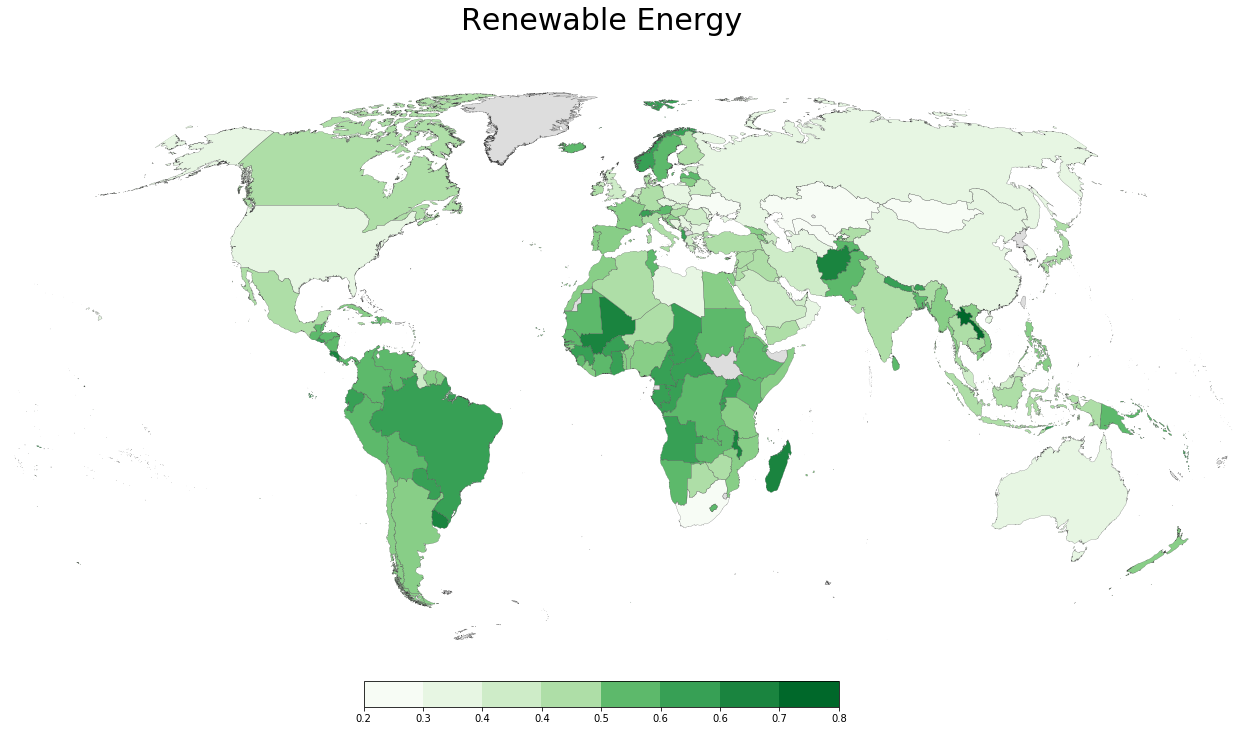

In [20]:
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(area2, fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in merged_data.index:
        color = '#dddddd'
    else:
        color = scheme[merged_data.loc[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
#plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')
plt.savefig('education_map.png')

